In [51]:
from DataPreparation_python import * 
import numpy as np
import matplotlib.pyplot as plt

<h2>3_Data analysis에 들어가기 이전에</h2> <br />

이미 대부분의 전처리 과정은 2_Data preparation에서 끝냈었다. 그러므로, 3_Data analysis에서는 더 무리한 데이터 전처리를 진행할 필요성은
없다고 느꼈다. <br /> 그리하여, 대부분의 함수는 .py에서 import 하여 2_Data preparation_Dataset.ipynb에서 제작한 함수 및 클래스를 이어서 사용할 수 있도록 하였다. <br />
또한, numpy는 3_Data analysis 부분보다도 4_Deep learning에서 보다 더 많이 사용할 계획이다. 


In [77]:
'''
class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2
        
    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)
    
    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else: 
            self.word2count[word] += 1
'''

print("한국어 단어 개수: " + str(input_lang.n_words))
print("영어 단어 개수: " + str(output_lang.n_words)) 

한국어 단어 개수: 35037
영어 단어 개수: 12080


In [71]:
input_count = pd.concat([df(input_lang.word2count.keys()), df(input_lang.word2count.values())], axis=1)
input_count.columns = ['key', 'value']

input_count_sorted = input_count.sort_values(by=['value'], axis=0,ascending=False, inplace=False)
input_count_sorted[1: 7]

,key,value
203,나는,14247
0,우리는,5041
5251,그는,3094
25,그녀는,2265
1386,난,1783
99,수,1148


In [58]:
output_count = pd.concat([df(output_lang.word2count.keys()), df(output_lang.word2count.values())], axis=1)
output_count.columns = ['key', 'value']

output_count_sorted = output_count.sort_values(by=['value'], axis=0,ascending=False, inplace=False)
output_count_sorted[1: 7]

,key,value
124,I,18013
36,to,9594
132,the,8389
14,a,6834
0,We,4637
29,you,3647


input_lang: 한국어, output_lang: 영어 <br />
input_lang과 output_lang은 Lang 클래스이므로, 클래스 변수 등을 통해서 값을 조회해야 한다. <br />
기본적인 단어 및 영어들의 빈도수를 분석하기 위해서 DataFrame을 병합하고, 정렬해준다. <br />

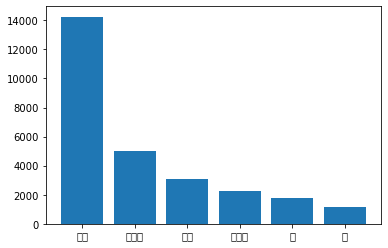

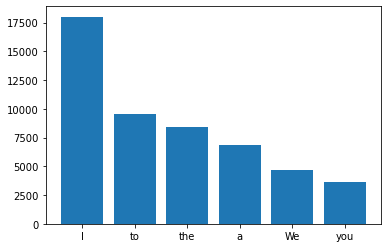

In [70]:
x = np.arange(6)
plt.xticks(x, input_count_sorted['key'][1:7])
plt.bar(x, input_count_sorted['value'][1:7])
plt.show()

y = np.arange(6)
plt.xticks(y, output_count_sorted['key'][1:7])
plt.bar(y, output_count_sorted['value'][1:7])
plt.show()

# 만약 밑 이미지에서 한글 글씨가 깨진다면, font 설치 및 적용이 필요하다.

위와 같이 가장 빈도수가 높은 한국어 및 영어 단어들을 matplotlib으로 표현해봤다. <br />
예상했던 것처럼 대명사의 빈도가 압도적으로 많은 것을 볼 수 있다. <br />
이를 이용해서, WordCloud를 제작할 수도 있지만, 빈도수는 막대 그래프로 보는 것이 더 가독성이 좋기 때문에, <br />
생략하도록 하겠다.

In [ ]:
'''
MAX_LENGTH = 15

eng_prefixes = (
    "i am ", "i m ",
    "he is", "he s ",
    "she is", "she s ",
    "you are", "you re ",
    "we are", "we re ",
    "they are", "they re "
)

kor_prefixes= (
    "나는", "난",
    "그는", "그녀는",
    "우리는", "그들은",
    "너는", "넌",
)


def filterPair(p):
    return len(p[0].split(' ')) < MAX_LENGTH and len(p[1].split(' ')) < MAX_LENGTH and p[0].startswith(kor_prefixes)
    # and p[1].startswith(eng_prefixes)
    # 만약 reverse=False면 p[0].startswith(eng_prefixes)

def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]
'''

위 주석은 2_Data preparation cell에 있던 코드이다. <br />
cell 자체는 2_Data preparation.ipynb에 존재하지만, 내용 및 목적은 3_Data analysis에 부합하여, 이곳에서 설명하고자 한다. <br />
필터링을 거치지 않은 문장의 데이터를 분석해보면, 너무나도 방대한 데이터가 존재하여, 너무 학습이 오래 걸리는 단점이 있다. <br />
그리하여, MAX_LENGTH를 지정함으로써, 학습 시간을 단축하고자 한다. <br />
또한, prefix를 지정하여, 특정한 형태로 시작하는 문장으로만 골라서 학습하여, 뜻이 특이하거나 outlier 문장은 최대한 거르고자 한다. <br />
<br />
위와 같은 코드는 3_Data analysis에 조금 더 부합한 내용이라고 생각되지만, 데이터셋 전처리하는 과정을 분리하기보다 <br />
하나의 함수로 통합하고자, 2_Data preparation.ipynb에 포함시켰다. <br />

1. 문장의 길이가 MAXLENGTH 이하인 문장만 학습한다. <br />
2. eng_prefixes를 선언하여, 이의 형태로 시작하는 문장만 골라서 학습한다. <br />

In [79]:
dataset.to_excel('3_Dataset.xlsx')
dataset.to_csv('3_Dataset.csv')